In [1]:
pwd

'C:\\Users\\LENOVO'

In [3]:
cd "C:\Users\LENOVO\Desktop\python examples youtube\tf tutorial"

C:\Users\LENOVO\Desktop\python examples youtube\tf tutorial


In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.0.0


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
data = pd.read_csv('creditcard.csv')

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.shape

(284807, 31)

In [11]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Balance Dataset

In [12]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [14]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [16]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [17]:
data = fraud.append(non_fraud, ignore_index = True)

In [18]:
data.shape

(984, 31)

In [20]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [22]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)


In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [29]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [30]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

Build CNN

In [32]:
epochs = 30
model = Sequential()
model.add(Conv1D(32, 2, activation = 'relu', input_shape= X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation = 'relu', input_shape= X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation ='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)             

In [44]:
model.compile(optimizer=Adam(lr = 0.00001), loss = 'binary_crossentropy', metrics = ['Accuracy'])

In [52]:
history = model.fit(X_train, y_train, epochs = epochs, validation_data = (X_test, y_test), verbose = 1)

Train on 787 samples, validate on 197 samples
Epoch 1/30
787/787 [==============================] - 1s 987us/sample - loss: 0.1629 - Accuracy: 0.0915 - val_loss: 0.1850 - val_Accuracy: 0.0812
Epoch 2/30
787/787 [==============================] - 1s 891us/sample - loss: 0.1632 - Accuracy: 0.0864 - val_loss: 0.1849 - val_Accuracy: 0.0863
Epoch 3/30
787/787 [==============================] - 1s 883us/sample - loss: 0.1706 - Accuracy: 0.0762 - val_loss: 0.1846 - val_Accuracy: 0.0863
Epoch 4/30
787/787 [==============================] - 1s 845us/sample - loss: 0.1870 - Accuracy: 0.0978 - val_loss: 0.1844 - val_Accuracy: 0.0914
Epoch 5/30
787/787 [==============================] - 1s 654us/sample - loss: 0.1707 - Accuracy: 0.0801 - val_loss: 0.1844 - val_Accuracy: 0.0914
Epoch 6/30
787/787 [==============================] - 0s 583us/sample - loss: 0.1534 - Accuracy: 0.0801 - val_loss: 0.1847 - val_Accuracy: 0.0914
Epoch 7/30
787/787 [==============================] - 0s 592us/sample - loss: 

In [54]:
#Learning Curve
def plot_learningCurve(history, epoch):
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range, history.history['Accuracy'])
  plt.plot(epoch_range, history.history['val_Accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc = 'upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc = 'upper left')
  plt.show()

In [55]:
history.history

{'loss': [0.1629421089265822,
  0.1631913314972267,
  0.17062611239364672,
  0.18700012112133385,
  0.1706656820248467,
  0.15337368740381854,
  0.19892937228973515,
  0.1632882461917446,
  0.1775425948780101,
  0.1693841625629833,
  0.1526696898677449,
  0.16102578812852747,
  0.1499338822186069,
  0.1630631531890496,
  0.13406895309345845,
  0.1560577716313899,
  0.16068832466456912,
  0.16715344727948175,
  0.147522766564368,
  0.14879047478699473,
  0.1414690018930914,
  0.15558136619031052,
  0.1539402016955682,
  0.1551083599748575,
  0.1433186230960916,
  0.14289357377810277,
  0.16561719773306477,
  0.1666376187053084,
  0.1774115042318383,
  0.17342231993526788],
 'Accuracy': [0.091486655,
  0.08640406,
  0.076238886,
  0.0978399,
  0.080050826,
  0.080050826,
  0.09275731,
  0.09656925,
  0.09275731,
  0.09402795,
  0.09656925,
  0.0978399,
  0.0978399,
  0.078780174,
  0.08640406,
  0.09656925,
  0.09275731,
  0.0952986,
  0.099110544,
  0.087674715,
  0.09656925,
  0.095298

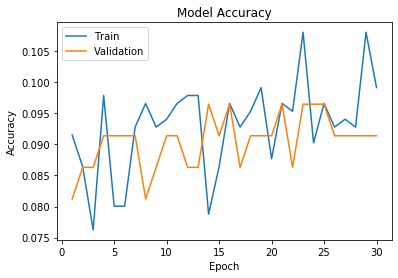

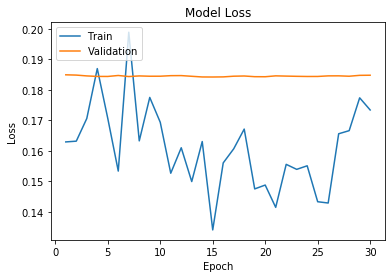

In [56]:
plot_learningCurve(history,epochs)